# Here we predict Doctors consultation fees

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [245]:
ds=pd.read_excel("Final_Train.xlsx")
ds

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [246]:
ds.shape

(5961, 7)

Observation:
    
    There are 5961 rows and 7 columns present in our dataset.

In [247]:
ds.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

Features:
    
    Qualification: Qualification and degrees held by the doctor

    Experience: Experience of the doctor in number of years

    Rating: Rating given by patients

    Profile: Type of the doctor

    Miscellaeous_Info: Extra information about the doctor

    Fees: Fees charged by the doctor

    Place: Area and the city where the doctor is located

In [248]:
ds.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

Observation:
    
    1. Fees is in int64 data type.
    
    2. Other all columns are in object data type.

# Checking missing values

In [249]:
ds.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Observation:
    
    1. There are 3302 missing values in Rating column.
    2. 25 missing values in place column.
    3. 2620 missing values in Miscellaneous_Info column.

We can also see this via visualization with the help of heatmap.

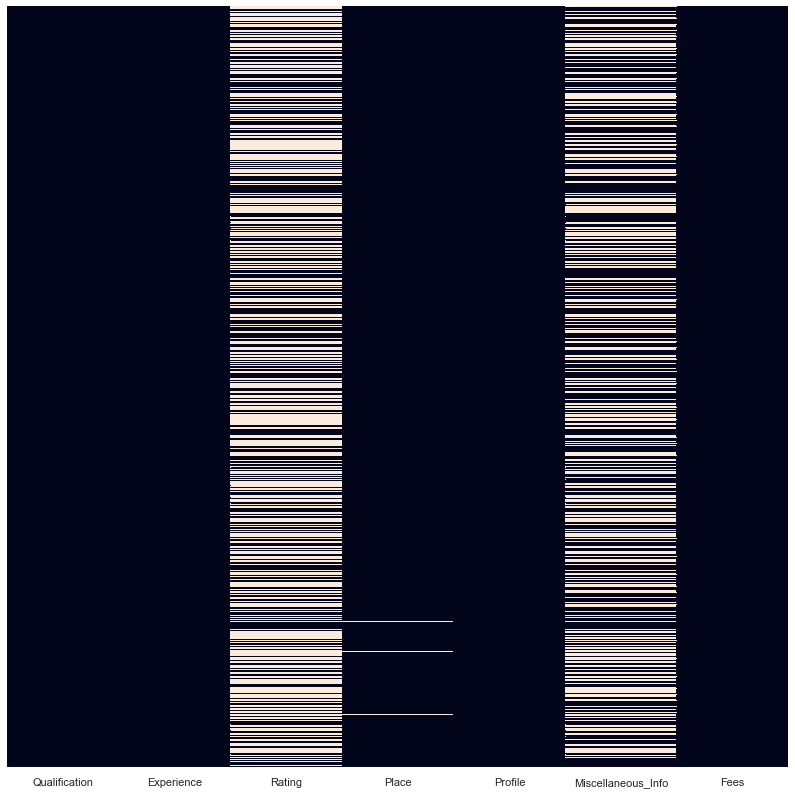

In [250]:
plt.figure(figsize=(14,14))
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)

# Exploring categorical columns

In [251]:
for column in ds.columns:
    if ds[column].dtypes == object:
        print(str(column) + ' : ' + str(ds[column].unique()))
        print(ds[column].value_counts())
        print('*******************************************************************************************************')
        print('\n')

Qualification : ['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                             488
BHMS                                                                                            477
BAMS                                                                                            471
MBBS                                                                                            334
MBBS, MS - ENT                                                                                  220
                                                                                               ... 
MD - Dermatology , Venereology & Leprosy, 

Observation:
    
    1. Maximum(488) number of doctors in our dataset are with qualification BDS.
    
    2. Maximum(323) number of doctors in our dataset are with 9 years expereince.
    
    3. Maximum(684) number of doctors in our dataset are with 100% rating.

In [252]:
#Filling the null values in categorical column place with most_frequent strategy
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
ds.Place=imputer.fit_transform(ds['Place'].values.reshape(-1,1))

In [253]:
ds.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Observation:
    
    We have imputed missing values in Place column with strategy most_frequent

In [260]:
from collections import Counter
Counter(ds['Qualification'])

Counter({'BHMS, MD - Homeopathy': 93,
         'BAMS, MD - Ayurveda Medicine': 82,
         'MBBS, MS - Otorhinolaryngology': 44,
         'BSc - Zoology, BAMS': 1,
         'BAMS': 471,
         'BHMS': 477,
         'BDS': 488,
         'MBBS, MD - General Medicine': 177,
         'BSc, BDS': 1,
         'MBBS, MS, DNB - ENT': 1,
         'BDS, MDS': 63,
         'BDS, MDS - Oral & Maxillofacial Surgery': 57,
         'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT': 27,
         'MBBS, Diploma in Otorhinolaryngology (DLO)': 84,
         'MBBS, MF- Homeopathy': 2,
         'MBBS, MS - ENT': 220,
         'MBBS': 334,
         'MDS, DNB, BDS': 1,
         'MBBS, DNB - ENT': 16,
         'MBBS, Fellowship of College of General Practice (FCGP)': 5,
         'MBBS, DDVL': 92,
         'MBBS, IBCLC (USA)': 1,
         'MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)': 6,
         'Diploma in Dermatology, MBBS': 1,
         'MBBS, DDVL, Fellowship in Aesthet

In [261]:
#Encoding categorical columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Qualification']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))

# Feature Extraction

In [262]:
ds.Place = ds.Place.str.split(', ').str[-1]
ds.Place

0       Ernakulam
1       Bangalore
2       Bangalore
3       Bangalore
4         Chennai
          ...    
5956    Bangalore
5957      Chennai
5958        Delhi
5959       Mumbai
5960        Delhi
Name: Place, Length: 5961, dtype: object

In [263]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,24 years experience,100%,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,73,12 years experience,98%,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,1135,9 years experience,NaN,Bangalore,ENT Specialist,NaN,300
3,464,12 years experience,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,10,20 years experience,100%,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [264]:
ds = ds.assign(Experience = lambda x: x['Experience'].str.extract('(\d+)'))

In [265]:
ds = ds.assign(Rating = lambda x: x['Rating'].str.extract('(\d+)'))

In [266]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,73,12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,1135,9,NaN,Bangalore,ENT Specialist,NaN,300
3,464,12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,10,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [267]:
ds['Feedback']= ds.Miscellaneous_Info.str.extract(r'(\d+) (?:Feedback)')

In [268]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Feedback
0,401,24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,16
1,73,12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,76
2,1135,9,NaN,Bangalore,ENT Specialist,NaN,300,NaN
3,464,12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,NaN
4,10,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,4


In [269]:
ds['RatingPresent']=np.where(ds['Rating'].isnull(),'Rating absent','Rating present')

In [270]:
ds['FeedbackPresent']=np.where(ds['Feedback'].isnull(),'Feedback absent','Feedback present')

In [271]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Feedback,RatingPresent,FeedbackPresent
0,401,24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,16,Rating present,Feedback present
1,73,12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,76,Rating present,Feedback present
2,1135,9,NaN,Bangalore,ENT Specialist,NaN,300,NaN,Rating absent,Feedback absent
3,464,12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,NaN,Rating absent,Feedback absent
4,10,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,4,Rating present,Feedback present


# Changing the data types of extracted numeric columns

In [272]:
ds.dtypes

Qualification          int32
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
Feedback              object
RatingPresent         object
FeedbackPresent       object
dtype: object

In [273]:
data_types_dict = {'Experience':int , 'Rating':float, 'Feedback':float}

In [274]:
ds = ds.astype(data_types_dict)

In [ ]:
ds.dtypes

Observation:
    
    Now our all numeric columns are converted to suitable float64 data types.

# Summary Stastics

In [275]:
ds.describe()

,Qualification,Experience,Rating,Fees,Feedback
count,5961.000000,5961.000000,2659.000000,5961.000000,1569.000000
mean,596.857574,17.303976,94.643475,307.944640,39.411090
std,413.842446,11.142798,7.852813,190.920373,90.593303
min,0.000000,0.000000,7.000000,5.000000,1.000000
25%,219.000000,9.000000,93.000000,150.000000,5.000000
50%,596.000000,14.000000,97.000000,300.000000,14.000000
75%,943.000000,23.000000,100.000000,500.000000,37.000000
max,1419.000000,66.000000,100.000000,950.000000,1782.000000


Observation:
    
    1. Maximum standard deviation is observed in the Qualification column.
    
    2. In the columns Experience, Fees, Feedback mean is considerably greater than median so the columns are positively skewed.
    
    3. In the columns Rating Median is greater than Mean so the column is negatively skewed.
    
    4. The maximum Fees observed is 950 while the minimum is 5.
    
    5. In the columns Qualification, Expereince, Fees, Feedback there is huge difference between maximum and 75th percentile so outliers are present here.

# To check the correlation

In [276]:
ds_cor=ds.corr()
ds_cor

,Qualification,Experience,Rating,Fees,Feedback
Qualification,1.000000,0.134697,-0.246633,0.263214,0.024168
Experience,0.134697,1.000000,-0.313592,0.002117,-0.013131
Rating,-0.246633,-0.313592,1.000000,-0.133572,0.119677
Fees,0.263214,0.002117,-0.133572,1.000000,0.037955
Feedback,0.024168,-0.013131,0.119677,0.037955,1.000000


Observation:
    
    For better understanding we will se it via visualization through heatmap.

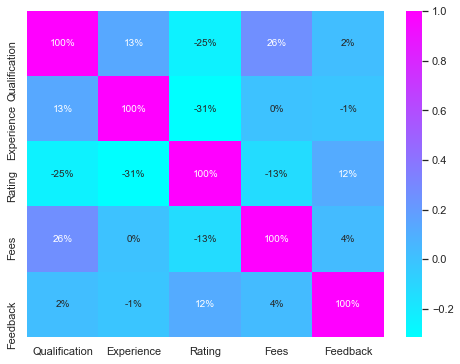

In [277]:
plt.figure(figsize=(8,6))
sns.heatmap(ds_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

Observation:
    
    1. Fees is negatively correlated with Rating and positively correlated with Qualification.
    
    2. Qualification is positively correlated with Fees and negatively correlated with rating.
    
    3. Rating is negatively correlated with Experience and qualification.
    
    4. Place does not have any significant correlation.

Text(0.5, 1.0, 'correaltion with target variable Fees')

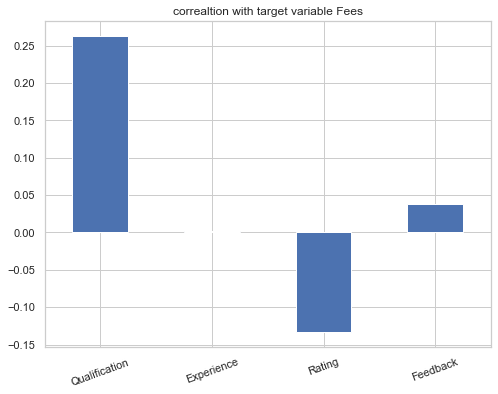

In [278]:
#checking the correlation with target variable 'Fees'

plt.figure(figsize=(8,6))
ds.drop('Fees', axis=1).corrwith(ds['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correaltion with target variable Fees")

Observation:
    
    1. Fees is highly positively correlated with Qualification.
    
    2. Fees is highly negatively correlated with Rating.

# Dropping the unnecessary columns

In [279]:
ds.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [280]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Feedback,RatingPresent,FeedbackPresent
0,401,24,100.0,Ernakulam,Homeopath,100,16.0,Rating present,Feedback present
1,73,12,98.0,Bangalore,Ayurveda,350,76.0,Rating present,Feedback present
2,1135,9,NaN,Bangalore,ENT Specialist,300,NaN,Rating absent,Feedback absent
3,464,12,NaN,Bangalore,Ayurveda,250,NaN,Rating absent,Feedback absent
4,10,20,100.0,Chennai,Ayurveda,250,4.0,Rating present,Feedback present


# Data Visualization

Our target variable is Fees column.

## Univariate Analysis

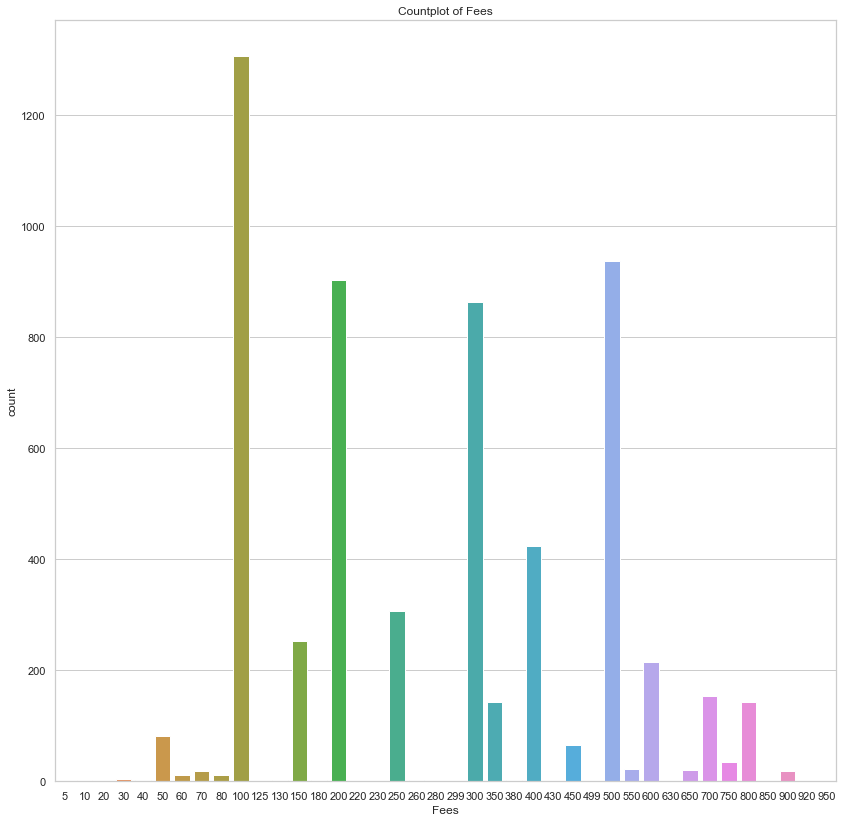

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

In [281]:
#Checking the target variable

plt.subplots(figsize=(14,14))
sns.countplot(x="Fees", data=ds)
plt.title("Countplot of Fees")
plt.xlabel('Fees')
plt.ylabel("count")
plt.show()

ds['Fees'].value_counts()

Observation:
    
    1. Fees observed in maximum(1306) number of columns is 100.
    
    2. Maximum Fees observed is 950.

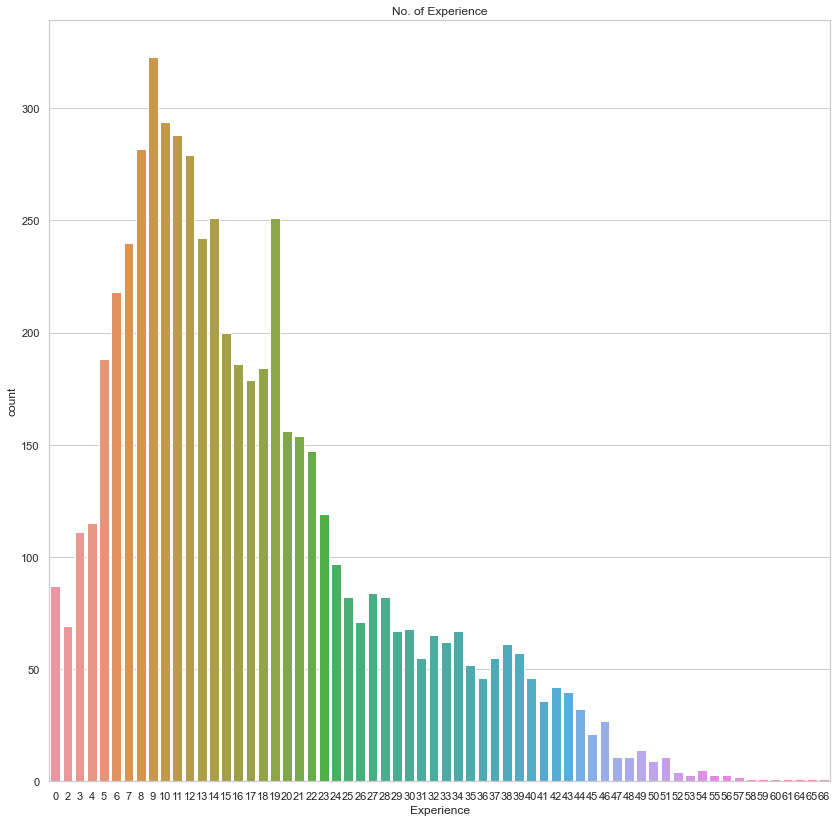

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64

In [282]:
#Checking the Experience

plt.subplots(figsize=(14,14))
sns.countplot(x="Experience", data=ds)
plt.title("No. of Experience")
plt.xlabel('Experience')
plt.ylabel("count")
plt.show()

ds['Experience'].value_counts()

Observation:
    
    1. 9 years of Experience is observed in maximum(323) number of columns.
    
    2. Maximum years of Experience observed is 66.

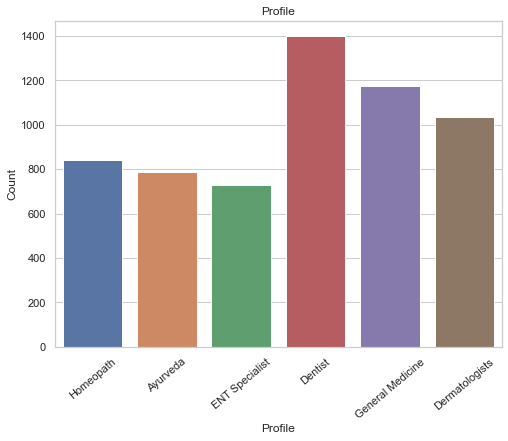

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [283]:
#Checking the Profile

plt.subplots(figsize=(8,6))
sns.countplot(x="Profile", data=ds)
plt.title("Profile")
plt.xticks(rotation=40)
plt.xlabel('Profile')
plt.ylabel("Count")
plt.show()

ds['Profile'].value_counts()

Observation:
    
    1. Maximum(1397) number of Dentist are present in our dataset.

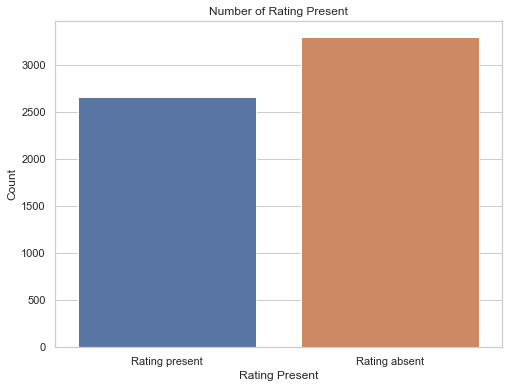

Rating absent     3302
Rating present    2659
Name: RatingPresent, dtype: int64

In [284]:
#Checking the Rating Present

plt.subplots(figsize=(8,6))
sns.countplot(x="RatingPresent", data=ds)
plt.title("Number of Rating Present")
plt.xlabel('Rating Present')
plt.ylabel("Count")
plt.show()

ds['RatingPresent'].value_counts()

Observation:
    
    1. 3302 ratings are missing in our dataset.
    
    2. 2659 rating are present in our dataset.

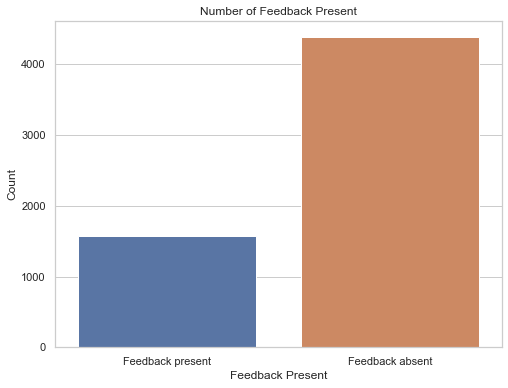

Feedback absent     4392
Feedback present    1569
Name: FeedbackPresent, dtype: int64

In [285]:
#Checking the Feedback Present

plt.subplots(figsize=(8,6))
sns.countplot(x="FeedbackPresent", data=ds)
plt.title("Number of Feedback Present")
plt.xlabel('Feedback Present')
plt.ylabel("Count")
plt.show()

ds['FeedbackPresent'].value_counts()

Observation:
    
    1. 4392 Feedback are missing in our dataset.
    
    2. 1569 Feedback are present in our dataset.

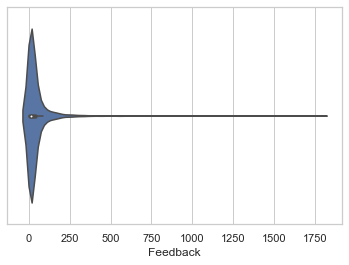

1.0      94
3.0      85
4.0      84
5.0      71
2.0      61
         ..
150.0     1
175.0     1
343.0     1
390.0     1
142.0     1
Name: Feedback, Length: 204, dtype: int64

In [286]:
#checking the Feedback

sns.set(style='whitegrid')
sns.violinplot(ds['Feedback'])
plt.show()

ds['Feedback'].value_counts()

Observation:
    
    1. There is 1 Feedback in maximum(94) columns.
    
    2. Maximum number of Feedback falls in the range of 0-50.

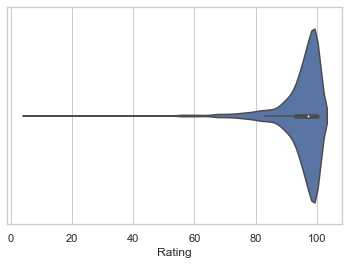

100.0    684
98.0     290
99.0     259
97.0     241
96.0     220
95.0     178
94.0     115
93.0     109
92.0      66
90.0      66
91.0      60
89.0      42
88.0      41
85.0      27
82.0      23
86.0      21
83.0      21
80.0      19
77.0      16
87.0      14
79.0      13
84.0      13
67.0      12
81.0      12
71.0       9
76.0       9
75.0       8
73.0       8
74.0       7
60.0       7
78.0       6
68.0       5
56.0       5
70.0       4
69.0       4
57.0       3
72.0       3
63.0       2
64.0       2
62.0       2
33.0       2
55.0       2
40.0       1
48.0       1
7.0        1
58.0       1
47.0       1
45.0       1
36.0       1
53.0       1
65.0       1
Name: Rating, dtype: int64

In [287]:
#checking the Rating

sns.set(style='whitegrid')
sns.violinplot(ds['Rating'])
plt.show()

ds['Rating'].value_counts()

Observation:
    
    1. Maximum rating in our dataset lies in the range of 90-100.
    
    2. Maximum rating(100) has been observed in maximum(684) number of columns.

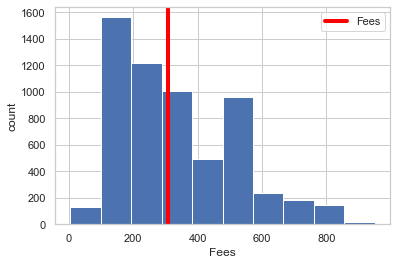

In [288]:
#checking the mean of Fees

red_shift = ds['Fees'].hist()
mean_val = np.mean(ds['Fees'])
plt.axvline(mean_val,linewidth=4, color='red', label='Fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    The mean of Fees is 320.

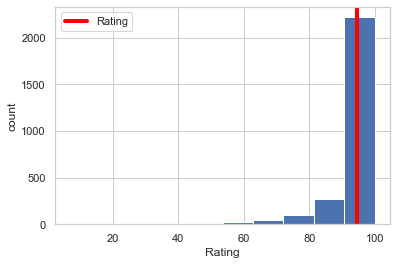

In [289]:
#checking the mean of Rating

red_shift = ds['Rating'].hist()
mean_val = np.mean(ds['Rating'])
plt.axvline(mean_val,linewidth=4, color='red', label='Rating')
plt.xlabel('Rating')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    Mean of Rating is 94.

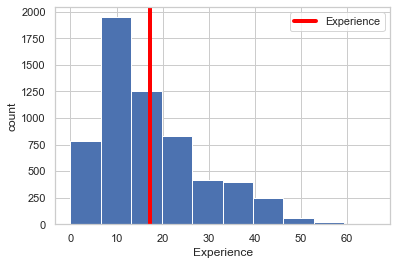

In [290]:
#checking the mean of Experience

red_shift = ds['Experience'].hist()
mean_val = np.mean(ds['Experience'])
plt.axvline(mean_val,linewidth=4, color='red', label='Experience')
plt.xlabel('Experience')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    Mean of Experience is 18.

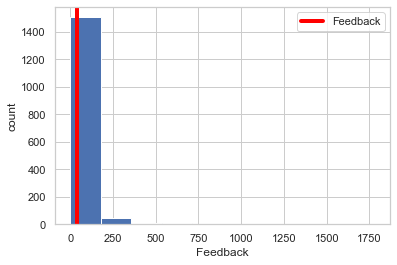

In [291]:
#checking the mean of Feedback

red_shift = ds['Feedback'].hist()
mean_val = np.mean(ds['Feedback'])
plt.axvline(mean_val,linewidth=4, color='red', label='Feedback')
plt.xlabel('Feedback')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    Mean of Feedback is around 50.

## Bivariate Analysis

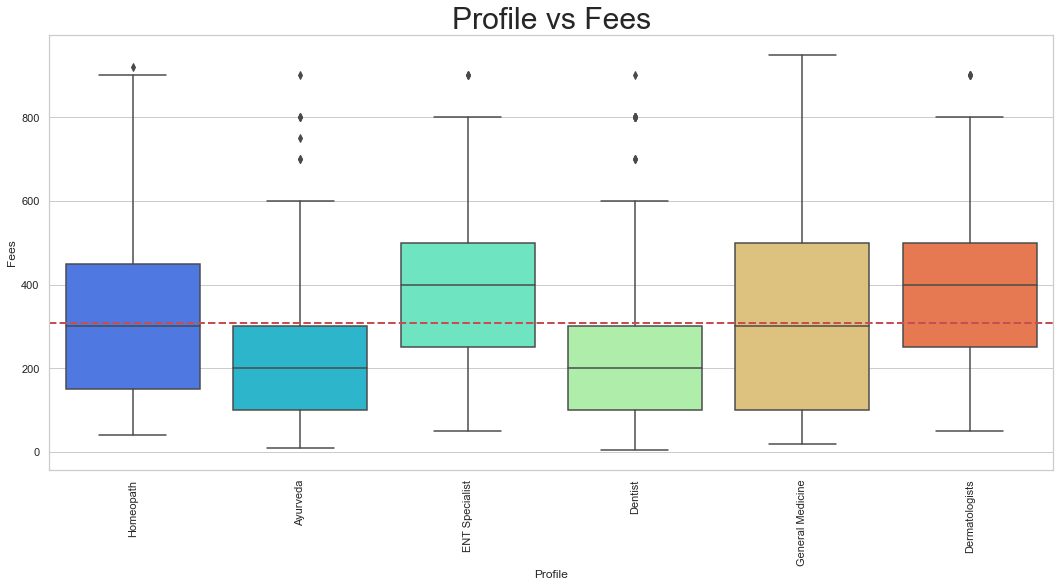

In [292]:
#Profile vs Fees

plt.figure(figsize=(18,8))
mean_price=np.mean(ds['Fees'])
sns.boxplot(y='Fees',x='Profile',data=ds,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Profile vs Fees",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    Maximum Fees is observed for ENT specialist.

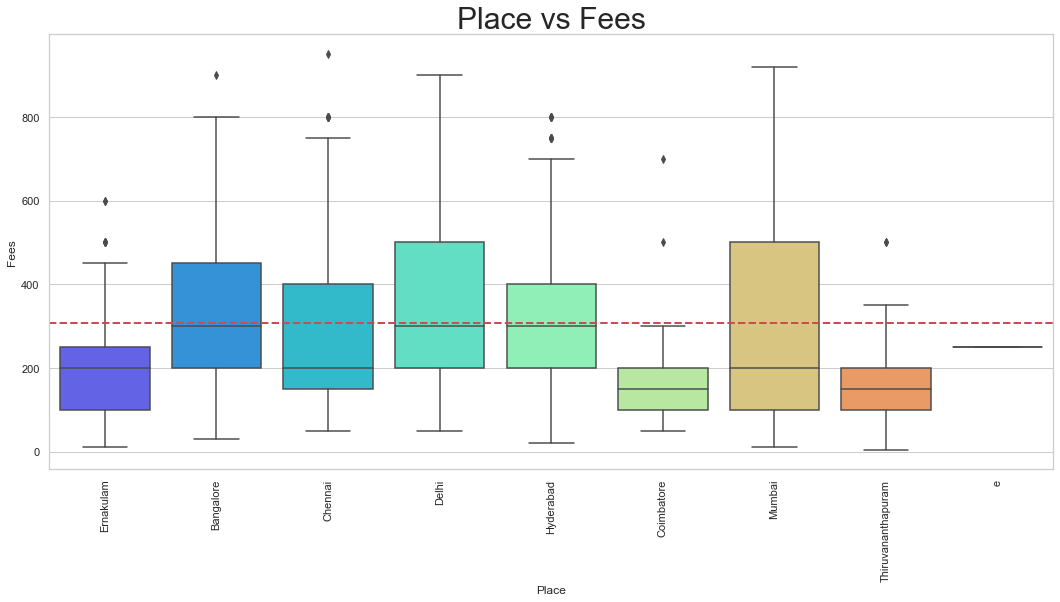

In [293]:
#Place vs Fees

plt.figure(figsize=(18,8))
mean_price=np.mean(ds['Fees'])
sns.boxplot(y='Fees',x='Place',data=ds,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Place vs Fees",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

<Figure size 1296x576 with 0 Axes>

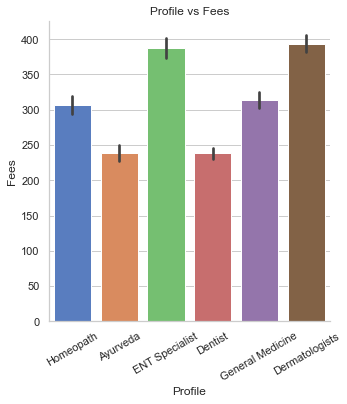

In [294]:
#Factor plot of Profile vs Fees
plt.figure(figsize=(18,8))
sns.factorplot(x='Profile',y='Fees',data=ds,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Profile vs Fees')
plt.xticks(rotation=30)
plt.ylabel('Fees')
plt.show()

<Figure size 576x288 with 0 Axes>

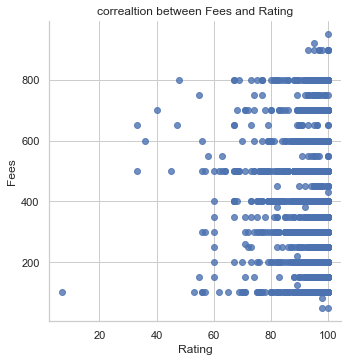

In [295]:
#scatter plot between Fees and Rating
plt.figure(figsize=(8,4))
sns.lmplot(x='Rating',y='Fees',fit_reg=False,data=ds)
plt.xlabel('Rating')
plt.title('correaltion between Fees and Rating')
plt.ylabel('Fees')
plt.show()

<Figure size 576x288 with 0 Axes>

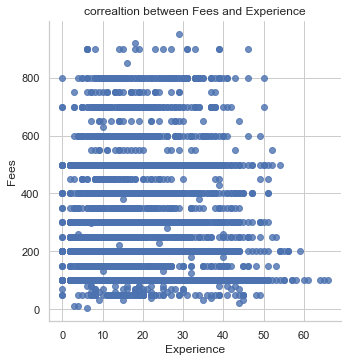

In [296]:
#scatter plot between Fees and Experience
plt.figure(figsize=(8,4))
sns.lmplot(x='Experience',y='Fees',fit_reg=False,data=ds)
plt.xlabel('Experience')
plt.title('correaltion between Fees and Experience')
plt.ylabel('Fees')
plt.show()

<Figure size 576x288 with 0 Axes>

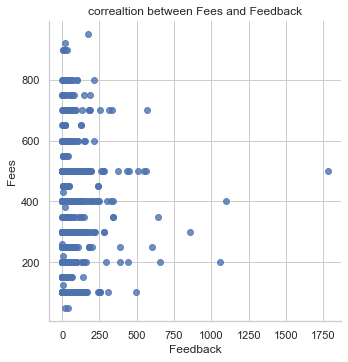

In [297]:
#scatter plot between Fees and Feedback
plt.figure(figsize=(8,4))
sns.lmplot(x='Feedback',y='Fees',fit_reg=False,data=ds)
plt.xlabel('Feedback')
plt.title('correaltion between Fees and Feedback')
plt.ylabel('Fees')
plt.show()

<Figure size 576x288 with 0 Axes>

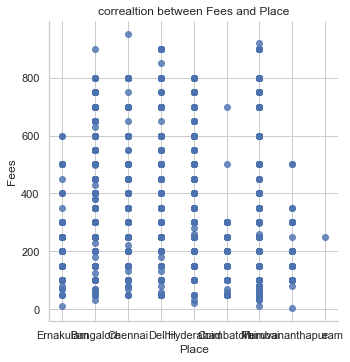

In [298]:
#scatter plot between Fees and Place
plt.figure(figsize=(8,4))
sns.lmplot(x='Place',y='Fees',fit_reg=False,data=ds)
plt.xlabel('Place')
plt.title('correaltion between Fees and Place')
plt.ylabel('Fees')
plt.show()

## Multivariate Analysis

<Figure size 1008x1008 with 0 Axes>

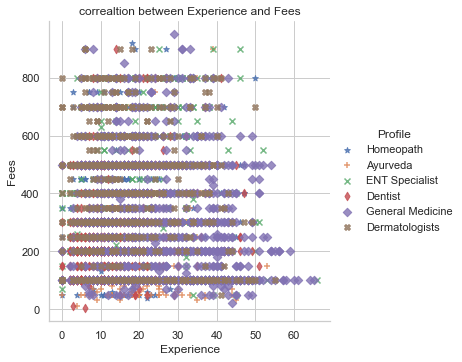

In [299]:
#scatter plot between Experience and Fees with respect to Profile
plt.figure(figsize=(14,14))
sns.lmplot(x='Experience',y='Fees',fit_reg=False,data=ds,hue='Profile',markers=['*','+','x','d','D','X'])
plt.xlabel('Experience')
plt.title('correaltion between Experience and Fees')
plt.ylabel('Fees')
plt.show()

<Figure size 1008x1008 with 0 Axes>

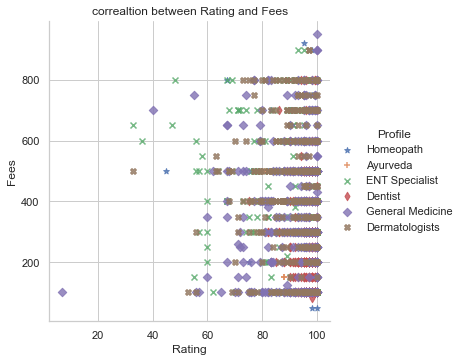

In [300]:
#scatter plot between Rating and Fees with respect to Profile
plt.figure(figsize=(14,14))
sns.lmplot(x='Rating',y='Fees',fit_reg=False,data=ds,hue='Profile',markers=['*','+','x','d','D','X'])
plt.xlabel('Rating')
plt.title('correaltion between Rating and Fees')
plt.ylabel('Fees')
plt.show()

<Figure size 1008x1008 with 0 Axes>

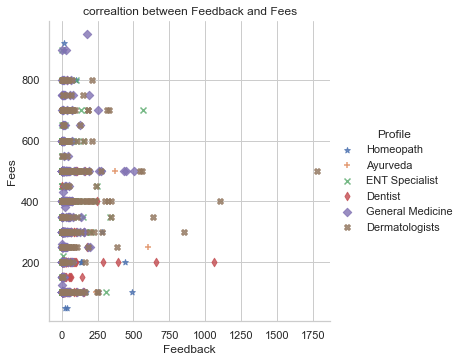

In [301]:
#scatter plot between Feedback and Fees with respect to Profile
plt.figure(figsize=(14,14))
sns.lmplot(x='Feedback',y='Fees',fit_reg=False,data=ds,hue='Profile',markers=['*','+','x','d','D','X'])
plt.xlabel('Feedback')
plt.title('correaltion between Feedback and Fees')
plt.ylabel('Fees')
plt.show()

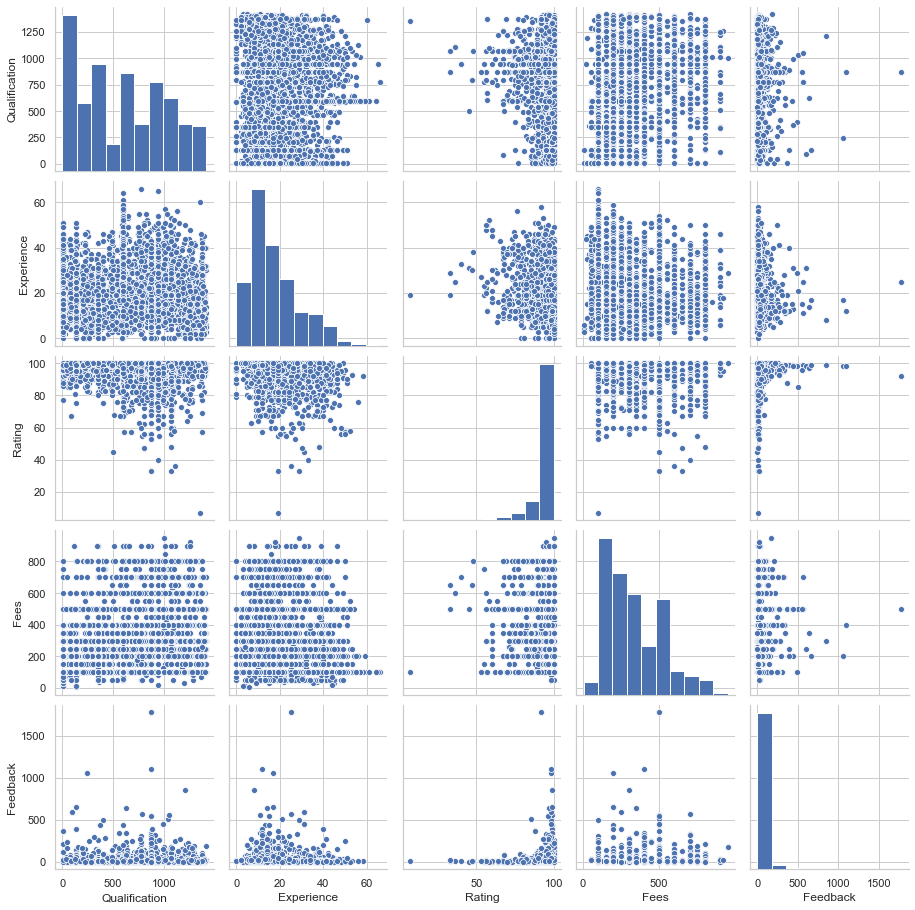

In [302]:
sns.pairplot(ds)

### Imputing missing values in Rating and Feedback

In [303]:
#Filling the null values in Rating column with Random Sample Imputation

def impute_nan(ds,variable,median):
    ds[variable+"_median"]=ds[variable].fillna(median)
    ds[variable+"_random"]=ds[variable]
    random_sample=ds[variable].dropna().sample(ds[variable].isnull().sum(),random_state=0,replace=True)
    random_sample.index=ds[ds[variable].isnull()].index
    ds.loc[ds[variable].isnull()].index
    ds.loc[ds[variable].isnull(),variable+'_random']=random_sample

In [304]:
median=ds.Rating.median()

In [305]:
median

97.0

In [306]:
impute_nan(ds,"Rating",median)

In [307]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Feedback,RatingPresent,FeedbackPresent,Rating_median,Rating_random
0,401,24,100.0,Ernakulam,Homeopath,100,16.0,Rating present,Feedback present,100.0,100.0
1,73,12,98.0,Bangalore,Ayurveda,350,76.0,Rating present,Feedback present,98.0,98.0
2,1135,9,NaN,Bangalore,ENT Specialist,300,NaN,Rating absent,Feedback absent,97.0,94.0
3,464,12,NaN,Bangalore,Ayurveda,250,NaN,Rating absent,Feedback absent,97.0,91.0
4,10,20,100.0,Chennai,Ayurveda,250,4.0,Rating present,Feedback present,100.0,100.0


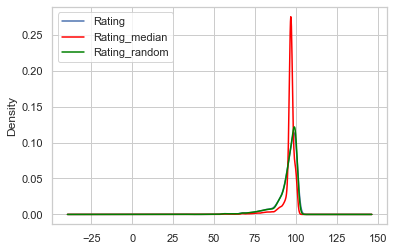

In [308]:
fig = plt.figure()
ax = fig.add_subplot(111)
ds['Rating'].plot(kind='kde', ax=ax)
ds.Rating_median.plot(kind='kde', ax=ax, color='red')
ds.Rating_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Observation:
    
    The variance of Rating_random is much similar to Rating than that of Rating_median.

In [309]:
#Filling the null values in Feedback column with Random Sample Imputation

def impute_nan(ds,variable,median):
    ds[variable+"_median"]=ds[variable].fillna(median)
    ds[variable+"_random"]=ds[variable]
    random_sample=ds[variable].dropna().sample(ds[variable].isnull().sum(),random_state=0,replace=True)
    random_sample.index=ds[ds[variable].isnull()].index
    ds.loc[ds[variable].isnull()].index
    ds.loc[ds[variable].isnull(),variable+'_random']=random_sample

In [310]:
median1=ds.Feedback.median()

In [311]:
median1

14.0

In [312]:
impute_nan(ds,"Feedback",median1)

In [313]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Feedback,RatingPresent,FeedbackPresent,Rating_median,Rating_random,Feedback_median,Feedback_random
0,401,24,100.0,Ernakulam,Homeopath,100,16.0,Rating present,Feedback present,100.0,100.0,16.0,16.0
1,73,12,98.0,Bangalore,Ayurveda,350,76.0,Rating present,Feedback present,98.0,98.0,76.0,76.0
2,1135,9,NaN,Bangalore,ENT Specialist,300,NaN,Rating absent,Feedback absent,97.0,94.0,14.0,11.0
3,464,12,NaN,Bangalore,Ayurveda,250,NaN,Rating absent,Feedback absent,97.0,91.0,14.0,12.0
4,10,20,100.0,Chennai,Ayurveda,250,4.0,Rating present,Feedback present,100.0,100.0,4.0,4.0


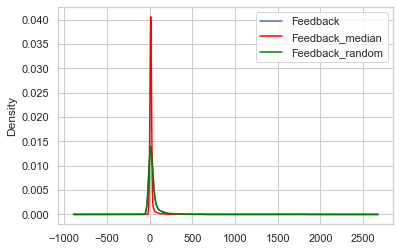

In [314]:
fig = plt.figure()
ax = fig.add_subplot(111)
ds['Feedback'].plot(kind='kde', ax=ax)
ds.Feedback_median.plot(kind='kde', ax=ax, color='red')
ds.Feedback_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Observation:
    
    The variance of Feedback_random is much similar to Feedback than thatof Feedback_median.

# Handling categorical data

### Using OneHotEncoding to convert the Profile, Rating Present, Feedback Present column because it is nominal Categorical data.

In [315]:
#Converting Profile column

Profile = ds['Profile']
Profile = pd.get_dummies(Profile, drop_first=True)
Profile.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [316]:
#Converting Place column

Place = ds['Place']
Place = pd.get_dummies(Place, drop_first=True)
Place.head()

,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,e
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [317]:
#Converting Rating Present column

RatingPresent = ds['RatingPresent']
RatingPresent = pd.get_dummies(RatingPresent, drop_first=True)
RatingPresent.head()

,Rating present
0,1
1,1
2,0
3,0
4,1


In [318]:
#Converting Feedback Present column

FeedbackPresent = ds['FeedbackPresent']
FeedbackPresent = pd.get_dummies(FeedbackPresent, drop_first=True)
FeedbackPresent.head()

,Feedback present
0,1
1,1
2,0
3,0
4,1


In [324]:
df=pd.concat([ds, Profile, RatingPresent, FeedbackPresent, Place],axis=1)

In [325]:
Place['e'].value_counts()

0    5960
1       1
Name: e, dtype: int64

In [326]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Feedback,RatingPresent,FeedbackPresent,Rating_median,...,Rating present,Feedback present,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,e
0,401,24,100.0,Ernakulam,Homeopath,100,16.0,Rating present,Feedback present,100.0,...,1,1,0,0,0,1,0,0,0,0
1,73,12,98.0,Bangalore,Ayurveda,350,76.0,Rating present,Feedback present,98.0,...,1,1,0,0,0,0,0,0,0,0
2,1135,9,NaN,Bangalore,ENT Specialist,300,NaN,Rating absent,Feedback absent,97.0,...,0,0,0,0,0,0,0,0,0,0
3,464,12,NaN,Bangalore,Ayurveda,250,NaN,Rating absent,Feedback absent,97.0,...,0,0,0,0,0,0,0,0,0,0
4,10,20,100.0,Chennai,Ayurveda,250,4.0,Rating present,Feedback present,100.0,...,1,1,1,0,0,0,0,0,0,0


## Dropping the unnecessary columns

In [327]:
df.drop(['Profile','Place','RatingPresent','FeedbackPresent','Rating','Rating_median','Feedback','Feedback_median','e'],axis=1,inplace=True)

In [328]:
df.head()

,Qualification,Experience,Fees,Rating_random,Feedback_random,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Rating present,Feedback present,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,401,24,100,100.0,16.0,0,0,0,0,1,1,1,0,0,0,1,0,0,0
1,73,12,350,98.0,76.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,1135,9,300,94.0,11.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,464,12,250,91.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10,20,250,100.0,4.0,0,0,0,0,0,1,1,1,0,0,0,0,0,0


# Checking Skewness

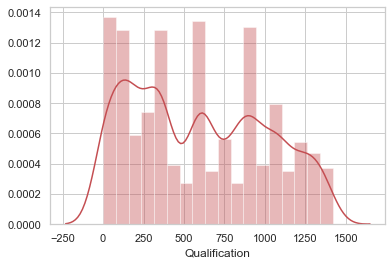

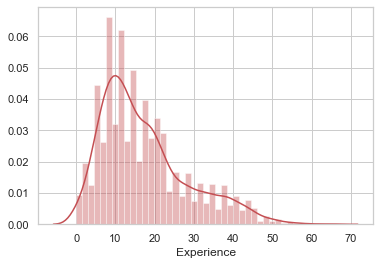

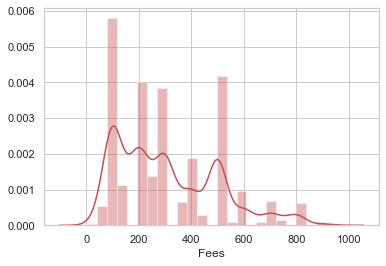

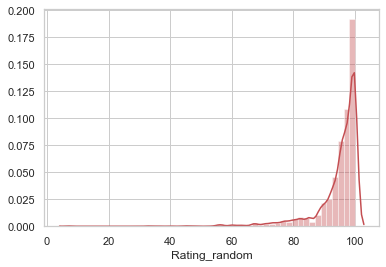

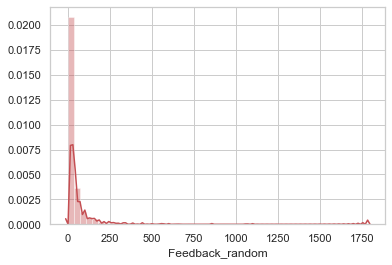

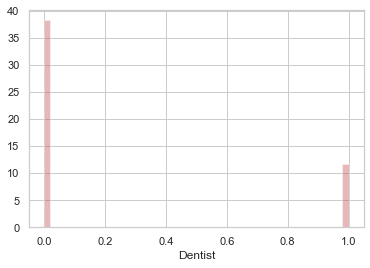

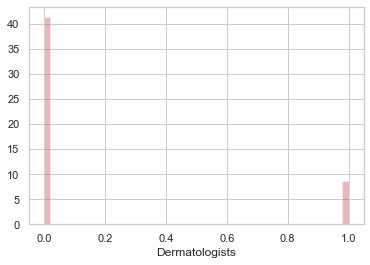

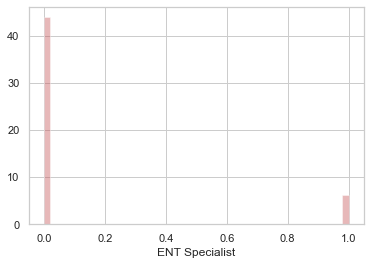

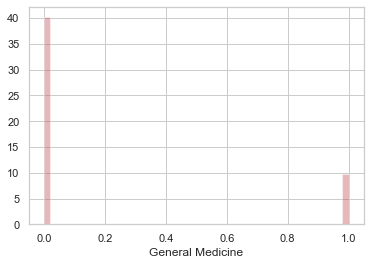

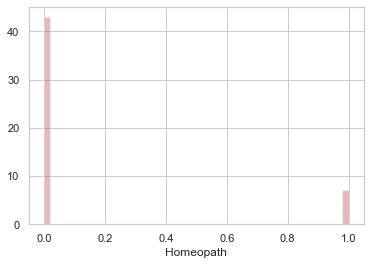

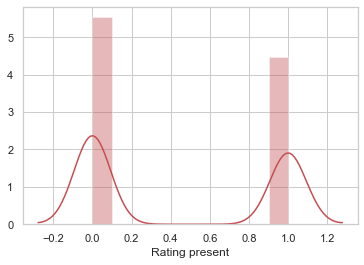

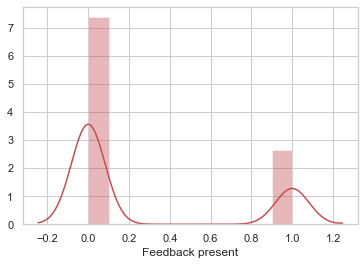

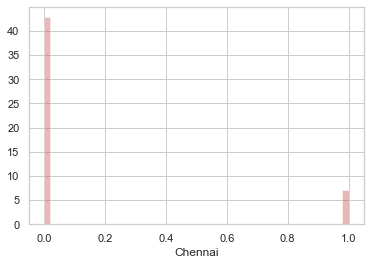

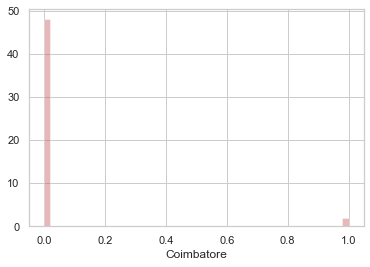

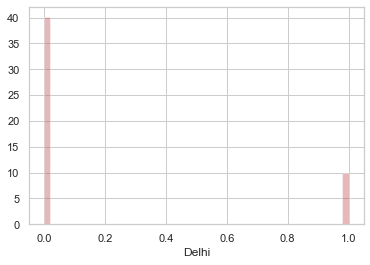

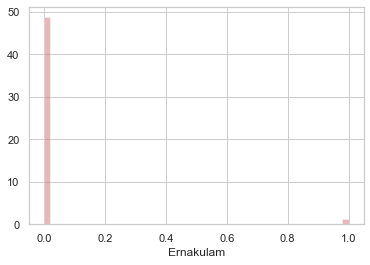

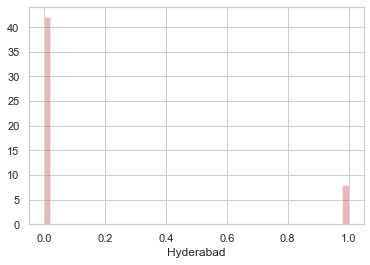

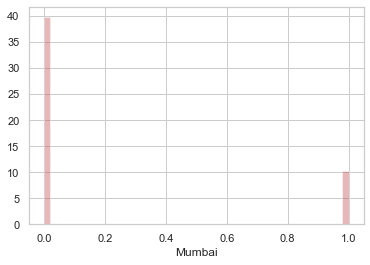

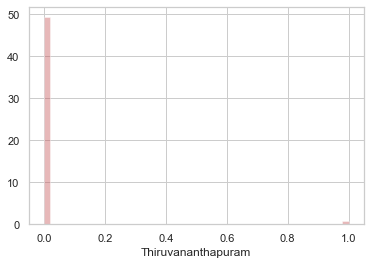

In [329]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [330]:
df.skew()

Qualification         0.239720
Experience            0.991089
Fees                  0.751870
Rating_random        -3.311611
Feedback_random       9.585325
Dentist               1.254545
Dermatologists        1.725211
ENT Specialist        2.308676
General Medicine      1.525779
Homeopath             2.058645
Rating present        0.217056
Feedback present      1.075666
Chennai               2.035059
Coimbatore            4.816241
Delhi                 1.509849
Ernakulam             6.000437
Hyderabad             1.860027
Mumbai                1.465681
Thiruvananthapuram    8.146287
dtype: float64

# Removing outliers

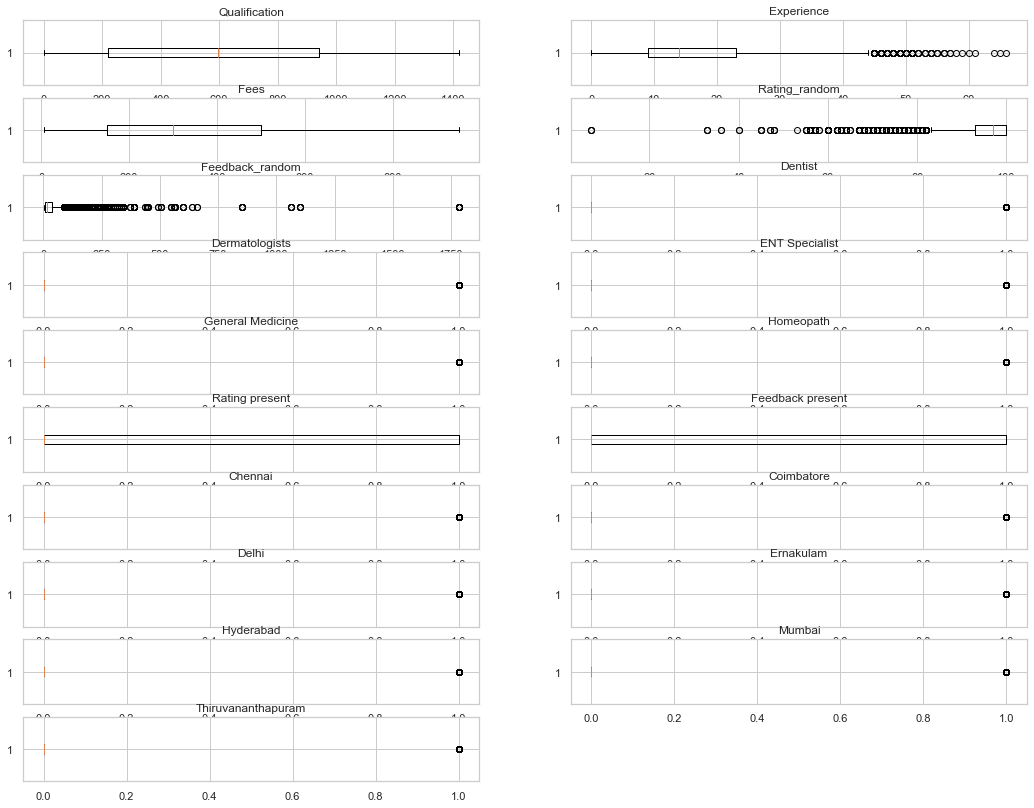

In [332]:
plt.figure(figsize=(18,14))

for i in range(len(df.columns)):
        plt.subplot(10,2,i+1)
        plt.boxplot(df[df.columns[i]], vert=False)
        plt.title(df.columns[i])
plt.show()

In [333]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(5961, 19)
(5256, 19)


In [334]:
df=df_final
print(df.shape)

(5256, 19)


## Removing skewness

In [335]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [336]:
df.skew()

Qualification         0.212451
Experience           -0.936461
Fees                 -0.375607
Rating_random        -1.952042
Feedback_random       0.248183
Dentist               1.412833
Dermatologists        1.654766
ENT Specialist        2.263183
General Medicine      1.569319
Homeopath             1.957612
Rating present        0.152693
Feedback present      1.079536
Chennai               1.906481
Coimbatore            0.000000
Delhi                 1.385170
Ernakulam             0.000000
Hyderabad             1.710816
Mumbai                1.348656
Thiruvananthapuram    0.000000
dtype: float64

# Model Training

In [337]:
x=df.drop(columns=['Fees'],axis=1)

In [338]:
y=df['Fees']

In [339]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(5256, 18) 		 (5256,)


In [340]:
#scaling input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [341]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 3 is 0.15346824678947935


In [342]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [343]:
#Importing all model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error metrics
from sklearn.model_selection import GridSearchCV,cross_val_score

In [344]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('********************************************************************************************')
    print('\n')

score of LinearRegression() is: 0.11008525105734313
Error:
Mean absolute error: 0.5084552415568281
Mean squared error: 0.38407456267684353
Root Mean Squared Error: 0.6197374949741572
r2_score: 0.15346824678947935
********************************************************************************************


score of DecisionTreeRegressor() is: 0.9999219659744003
Error:
Mean absolute error: 0.6567243991655852
Mean squared error: 0.7679237180500316
Root Mean Squared Error: 0.8763125686934038
r2_score: -0.6925666902856011
********************************************************************************************


score of KNeighborsRegressor() is: 0.34211830598464965
Error:
Mean absolute error: 0.5318501600234232
Mean squared error: 0.4522530480585481
Root Mean Squared Error: 0.6724976193701715
r2_score: 0.0031972880486547117
********************************************************************************************


score of SVR() is: 0.23320215159728408
Error:
Mean absolute error: 0.

In [345]:
#Cross validating all algorithms by using for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print("Mean score:",score.mean())
    print("Standard deviation:",score.std())
    print('****************************************************************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.13159103 0.13029581 0.11688462 0.09020751 0.12775196 0.10682695
 0.09954581 0.07215176 0.09314073 0.15105519]
Mean score: 0.11194513635060115
Standard deviation: 0.022618887889046656
****************************************************************************************************************************************************


Model: DecisionTreeRegressor()
Score: [-0.82000856 -0.85671707 -0.6293155  -0.7819956  -0.77189744 -0.39563275
 -0.56695511 -0.68349079 -0.80228    -0.69450588]
Mean score: -0.7002798709954479
Standard deviation: 0.13302429834622143
****************************************************************************************************************************************************


Model: KNeighborsRegressor()
Score: [ 0.05925471 -0.05809513  0.0428338  -0.05330784  0.0258807   0.0306163
  0.03425725 -0.05400586  0.03741024  0.05077846]
Mean score: 0.011562261809719343
Standard deviation: 0.04461065484143779
***************

### RandomForestRegressor is giving us better score so we choose it as our final model

In [346]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 600}


In [347]:
#using RandomForestRegressor with its best parameters

rf=RandomForestRegressor(n_estimators=700,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=6)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.23777314062196042


Mean absolute error: 0.48917503058973194
Mean squared error: 0.36251726556705516
Root Mean Squared error: 0.6020940670418993


r2_score: 0.20098229299353298




In [348]:
#Cross validating

score=cross_val_score(rf,x,y,cv=5,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.14044436 0.16870935 0.18325509 0.14422312 0.15522258]
Mean Score: 0.15837089774999416
Standard deviation: 0.015858997303151143


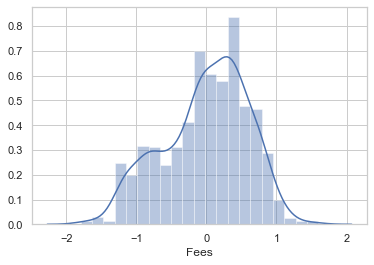

In [349]:
#plotting the distribution plot and we find the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

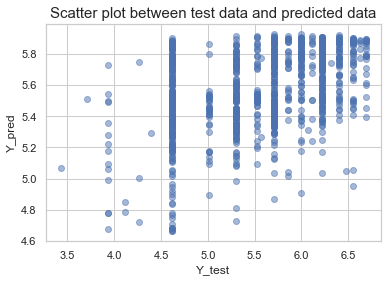

In [350]:
#Scatter plot between test data and prediction

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [351]:
#saving our model

import joblib
joblib.dump(rf,'rf_DoctorsConsultationFees.csv')

['rf_DoctorsConsultationFees.csv']

In [352]:
model=joblib.load('rf_DoctorsConsultationFees.csv')

In [353]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[5.44104252 5.83141887 5.29764942 5.88737031 5.33280735 5.0850341
 5.64429968 5.4833595  5.54420859 5.29102141 5.43421647 5.54152661
 5.63452064 5.8358062  5.37758766 5.84873434 5.73370935 5.80895206
 5.81992503 5.64087543 5.127393   5.79213127 5.11172421 5.84183007
 5.90307707 5.564282   5.82014636 5.6976542  5.50404393 4.7777498
 5.3581037  5.87254259 5.66562254 5.64020369 5.36321361 5.91132132
 5.05423321 5.86611822 5.21403745 5.73148007 5.81922927 5.29284391
 5.39437038 5.53933281 5.48791652 5.5339299  5.5288673  5.37415672
 5.71600488 5.88401581 5.78479803 5.0793953  5.88279048 5.7293788
 5.64488346 5.8155165  5.50501869 4.90108101 5.65783683 5.48866876
 5.84782965 5.50096897 5.78973861 5.73517127 5.45708216 5.8856773
 5.59210523 5.4388138  5.71698436 5.3331362  5.4913594  5.23279852
 5.48870638 5.84038535 5.37558338 5.49972692 5.47929696 5.53707861
 5.50693111 5.40726251 5.89700528 5.90241269 5.52007179 5.41126838
 5.04678449 5.77071354 5.87085828 5.22763259 5.52562725 5.54617753

# Nowe we load our test dataset

In [355]:
DS=pd.read_excel("Final_Test.xlsx")
DS

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


# Now we do all the changes as we did in our Training dataset

In [356]:
DS.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [357]:
#Filling the null values in categorical column place with most_frequent strategy
imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
DS.Place=imputer.fit_transform(DS['Place'].values.reshape(-1,1))

In [358]:
le=LabelEncoder()

list1=['Qualification']
for val in list1:
    DS[val]=le.fit_transform(DS[val].astype(str))

In [359]:
DS.Place = DS.Place.str.split(', ').str[-1]
DS.Place

0          Mumbai
1       Hyderabad
2         Chennai
3           Delhi
4       Bangalore
          ...    
1982    Bangalore
1983      Chennai
1984      Chennai
1985    Bangalore
1986      Chennai
Name: Place, Length: 1987, dtype: object

In [360]:
DS = DS.assign(Experience = lambda x: x['Experience'].str.extract('(\d+)'))

In [361]:
DS = DS.assign(Rating = lambda x: x['Rating'].str.extract('(\d+)'))

In [362]:
DS['Feedback']= DS.Miscellaneous_Info.str.extract(r'(\d+) (?:Feedback)')

In [363]:
DS['RatingPresent']=np.where(DS['Rating'].isnull(),'Rating absent','Rating present')

In [364]:
DS['FeedbackPresent']=np.where(DS['Feedback'].isnull(),'Feedback absent','Feedback present')

In [365]:
DS.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Feedback,RatingPresent,FeedbackPresent
0,241,35,NaN,Mumbai,General Medicine,NaN,NaN,Rating absent,Feedback absent
1,340,31,NaN,Hyderabad,ENT Specialist,NaN,NaN,Rating absent,Feedback absent
2,258,40,70,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",4,Rating present,Feedback present
3,6,0,NaN,Delhi,Ayurveda,NaN,NaN,Rating absent,Feedback absent
4,79,16,100,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...,NaN,Rating present,Feedback absent


In [366]:
DS.dtypes

Qualification          int32
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Feedback              object
RatingPresent         object
FeedbackPresent       object
dtype: object

In [367]:
data_types_dict = {'Experience':int , 'Rating':float, 'Feedback':float}

In [368]:
DS = DS.astype(data_types_dict)

In [369]:
#Filling the null values in Rating column with Random Sample Imputation

def impute_nan(DS,variable,median):
    DS[variable+"_median"]=DS[variable].fillna(median)
    DS[variable+"_random"]=DS[variable]
    random_sample=DS[variable].dropna().sample(DS[variable].isnull().sum(),random_state=0,replace=True)
    random_sample.index=DS[DS[variable].isnull()].index
    DS.loc[DS[variable].isnull()].index
    DS.loc[DS[variable].isnull(),variable+'_random']=random_sample

In [370]:
median=DS.Rating.median()

In [371]:
median

97.0

In [372]:
impute_nan(DS,"Rating",median)

In [373]:
#Filling the null values in Feedback column with Random Sample Imputation

def impute_nan(DS,variable,median):
    DS[variable+"_median"]=DS[variable].fillna(median)
    DS[variable+"_random"]=DS[variable]
    random_sample=DS[variable].dropna().sample(DS[variable].isnull().sum(),random_state=0,replace=True)
    random_sample.index=DS[DS[variable].isnull()].index
    DS.loc[DS[variable].isnull()].index
    DS.loc[DS[variable].isnull(),variable+'_random']=random_sample

In [374]:
median1=DS.Feedback.median()

In [375]:
median1

13.0

In [376]:
impute_nan(DS,"Feedback",median1)

In [377]:
DS.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Feedback,RatingPresent,FeedbackPresent,Rating_median,Rating_random,Feedback_median,Feedback_random
0,241,35,NaN,Mumbai,General Medicine,NaN,NaN,Rating absent,Feedback absent,97.0,97.0,13.0,11.0
1,340,31,NaN,Hyderabad,ENT Specialist,NaN,NaN,Rating absent,Feedback absent,97.0,98.0,13.0,11.0
2,258,40,70.0,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",4.0,Rating present,Feedback present,70.0,70.0,4.0,4.0
3,6,0,NaN,Delhi,Ayurveda,NaN,NaN,Rating absent,Feedback absent,97.0,97.0,13.0,207.0
4,79,16,100.0,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...,NaN,Rating present,Feedback absent,100.0,100.0,13.0,91.0


In [378]:
#Converting Profile column

Profile = DS['Profile']
Profile = pd.get_dummies(Profile, drop_first=True)
Profile.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0


In [379]:
#Converting Place column

Place = DS['Place']
Place = pd.get_dummies(Place, drop_first=True)
Place.head()

,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0


In [380]:
#Converting Rating Present column

RatingPresent = DS['RatingPresent']
RatingPresent = pd.get_dummies(RatingPresent, drop_first=True)
RatingPresent.head()

,Rating present
0,0
1,0
2,1
3,0
4,1


In [381]:
#Converting Feedback Present column

FeedbackPresent = DS['FeedbackPresent']
FeedbackPresent = pd.get_dummies(FeedbackPresent, drop_first=True)
FeedbackPresent.head()

,Feedback present
0,0
1,0
2,1
3,0
4,0


In [382]:
DF=pd.concat([DS, Profile, RatingPresent, FeedbackPresent, Place],axis=1)

In [383]:
DF.drop(['Profile','Place','RatingPresent','FeedbackPresent','Rating','Rating_median','Feedback','Feedback_median'],axis=1,inplace=True)

In [386]:
DF.head()

,Qualification,Experience,Miscellaneous_Info,Rating_random,Feedback_random,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Rating present,Feedback present,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,241,35,NaN,97.0,11.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,340,31,NaN,98.0,11.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,258,40,"70% 4 Feedback KK Nagar, Chennai",70.0,4.0,0,1,0,0,0,1,1,1,0,0,0,0,0,0
3,6,0,NaN,97.0,207.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,79,16,General Dentistry Conservative Dentistry Cosme...,100.0,91.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [387]:
DF.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [388]:
from scipy.stats import zscore
z_score=abs(zscore(DF))
print(DF.shape)
DF_final=DF.loc[(z_score<3).all(axis=1)]
print(DF_final.shape)

(1987, 18)
(1768, 18)


In [389]:
DF=DF_final
print(DF.shape)

(1768, 18)


In [390]:
for col in DF.columns:
    if DF.skew().loc[col]>0.55:
        DF[col]=np.log1p(DF[col])

In [391]:
DF.skew()

Qualification         0.257020
Experience           -0.947942
Rating_random        -1.636766
Feedback_random       0.297752
Dentist               1.495096
Dermatologists        1.703897
ENT Specialist        2.392513
General Medicine      1.294321
Homeopath             1.994784
Rating present        0.161291
Feedback present      0.922508
Chennai               1.938639
Coimbatore            0.000000
Delhi                 1.337004
Ernakulam             0.000000
Hyderabad             1.668467
Mumbai                1.364836
Thiruvananthapuram    0.000000
dtype: float64

In [392]:
ss=StandardScaler()
x1=ss.fit_transform(DF)
x1=pd.DataFrame(x1,columns=DF.columns)

In [393]:
#Testing our model
import sys
nums= model.predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[5.47166855 5.72948652 5.26486902 5.36393369 5.35897368 5.85081033
 5.38130754 5.9227221  5.63519752 5.33089439 5.6891347  5.88328138
 5.75494052 5.48753983 5.87939574 5.35683215 5.82802578 5.48040851
 5.72282481 5.8812443  5.27756054 5.71706116 5.4553898  5.38133125
 5.73244072 5.78080822 5.33384805 5.74179903 5.84250985 5.86473281
 5.64918679 5.3737805  5.54934239 5.52349175 5.35670801 5.39533314
 5.47391288 5.41563159 5.63194808 5.56082751 5.79782613 5.83176877
 5.64597799 5.5018526  5.74009073 5.77801848 5.52759617 5.756559
 5.44275472 5.48504729 5.82113114 5.64193934 5.5425214  5.50898933
 5.40709947 5.5944806  5.53343885 5.3549749  5.87578354 5.64462911
 5.53980588 5.52490741 5.79249681 5.78637054 5.53990372 5.48827356
 5.90473643 5.52564983 5.30185069 5.90940659 5.23856014 5.60879857
 5.77110792 5.34746255 5.45291129 5.38321264 5.47567836 5.73550078
 5.52796093 5.66523771 5.49000428 5.90863035 5.37202098 5.83533206
 5.52761772 5.87853102 5.47671448 5.28193315 5.62316781 5.174244